In [1]:
import pandas as pd
from datetime import datetime, timedelta
import time
import numpy as np
import pickle
import random
import csv
from IPython.display import clear_output
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('total_users_hashed.csv')

In [3]:
data

,user_id,cl,gender,age,country,city,political,life_views,people_views,religion,subscribtions
0,62abc4bd66be5ab27f8cd37f0bf1c564287878217b39f7...,nowar,M,37.0,Russia,Saint Petersburg,NaN,NaN,NaN,NaN,NaN
1,45b120bb08854e18123188f37c3d0b52d06781d415fb5b...,nowar,F,NaN,Russia,Saint Petersburg,NaN,NaN,NaN,NaN,NaN
2,39210a3c6fd62426ecc1eb0140988445293896bfbf0ec3...,nowar,M,NaN,Russia,Moscow,NaN,NaN,NaN,NaN,NaN
3,350943cdf91721a979269fcfcb9ba8c8f35f455d10f97e...,nowar,F,NaN,Russia,Saint Petersburg,NaN,красота и искусство,NaN,NaN,NaN
4,4b9028f83abac3e75837005a6c3b8c77fa7da29ae4723a...,nowar,F,38.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16378,0ce7a53d1f8e3fff034195334882b88c0c680378b85cd7...,z,M,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16379,c23e065f7a8b30872ac7002c840324632db80173e18983...,z,M,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16380,9907a4b23d76edb7a15596980bdc371bdd4526552cc19a...,z,F,23.0,Russia,Volgograd,NaN,NaN,NaN,NaN,NaN
16381,0f1b2e8ffcf16b31a546778fc2a1568fb48bce40d9fb7c...,z,M,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
n_total = 16383

In [7]:
n_total_nowar = 6752

In [8]:
n_total_z = 9631

# Gender

In [9]:
colors = ['dodgerblue', 'orangered', 'darkorchid', 'deepskyblue']

<AxesSubplot: title={'center': 'z'}, ylabel='gender'>

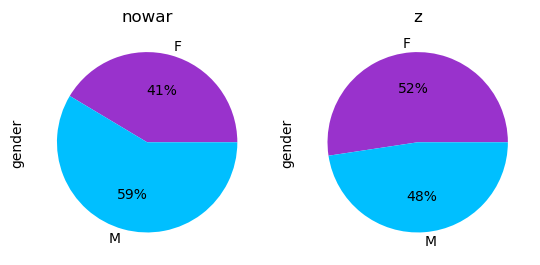

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
data['gender'][data['cl'] == 'nowar'][data['country'] == 'Russia'].value_counts().sort_index().plot.pie(ax = ax1, 
                                                                           title = 'nowar', 
                                                                           autopct='%1.0f%%',
                                                                          colors = colors[2:])
data['gender'][data['cl'] == 'z'][data['country'] == 'Russia'].value_counts().sort_index().plot.pie(ax = ax2, 
                                                                       title = 'z', 
                                                                       autopct='%1.0f%%',
                                                                      colors = colors[2:])

# plt.savefig('gender.pdf')

In [11]:
def normalize_by_age(data_initial, column_name = 'education'):
    
    age_groups = np.linspace(20,125,22)
    
    data_new = pd.DataFrame(columns=data_initial.columns)
    
    for i in range(len(age_groups)):
        
        if i == 0:
            age_min = 14
        else:
            age_min = age_groups[i]-5
            
        data_nowar_age = data[pd.notnull(data[column_name])][data['cl'] == 'nowar'][data['age'] >= age_min][data['age'] < age_groups[i]]
        data_z_age = data[pd.notnull(data[column_name])][data['cl'] == 'z'][data['age'] >= age_min][data['age'] < age_groups[i]]
        
        num_el_nowar = data_nowar_age[column_name].value_counts().sum()
        num_el_z = data_z_age[column_name].value_counts().sum()
        
#         print(num_el_nowar, num_el_z)
        
        if num_el_nowar<num_el_z:
            data_new = pd.concat([data_new, data_nowar_age])
            data_new = pd.concat([data_new, data_z_age.sample(n = num_el_nowar)])
        else:
            data_new = pd.concat([data_new, data_z_age])
            data_new = pd.concat([data_new, data_nowar_age.sample(n = num_el_z)])
    
    return data_new

# Country

In [12]:
total_countries_nowar = data['country'][data['cl'] == 'nowar'].value_counts().sum()
data_c_p_nowar = data['country'][data['cl'] == 'nowar'].value_counts()/total_countries_nowar
data_c_p_nowar1 = data_c_p_nowar[data_c_p_nowar > 0.05]
data_c_p_nowar1['other'] = 1 - data_c_p_nowar1.sum()

total_countries_z = data['country'][data['cl'] == 'z'].value_counts().sum()
data_c_p_z = data['country'][data['cl'] == 'z'].value_counts()/total_countries_z
data_c_p_z1 = data_c_p_z[data_c_p_z > 0.01]
data_c_p_z1['other'] = 1 - data_c_p_z1.sum()

In [13]:
total_countries_nowar

5427

In [14]:
total_countries_nowar/n_total_nowar

0.8037618483412322

In [15]:
total_countries_z

7667

In [16]:
total_countries_z/n_total_z

0.7960751739175579

<AxesSubplot: title={'center': 'z'}, ylabel='country'>

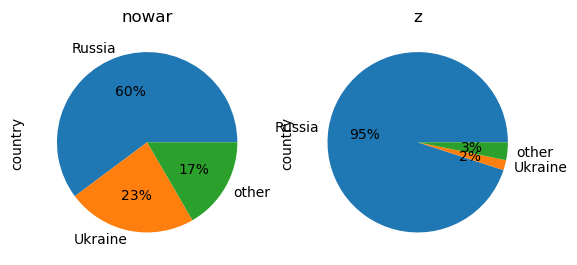

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2)
data_c_p_nowar1.plot.pie(ax = ax1, title = 'nowar', autopct='%1.0f%%')
data_c_p_z1.plot.pie(ax = ax2, title = 'z', autopct='%1.0f%%')

# plt.savefig('country.pdf')

# City

In [18]:
total_countries_nowar = data[data['country'] == 'Russia']['city'][data['cl'] == 'nowar'].value_counts().sum()
data_c_p_nowar = data[data['country'] == 'Russia']['city'][data['cl'] == 'nowar'].value_counts()/total_countries_nowar
data_c_p_nowar1 = data_c_p_nowar[data_c_p_nowar > 0.05]
data_c_p_nowar1['other'] = 1 - data_c_p_nowar1.sum()

total_countries_z = data[data['country'] == 'Russia']['city'][data['cl'] == 'z'].value_counts().sum()
data_c_p_z = data[data['country'] == 'Russia']['city'][data['cl'] == 'z'].value_counts()/total_countries_z
data_c_p_z1 = data_c_p_z[data_c_p_z > 0.05]
data_c_p_z1['other'] = 1 - data_c_p_z1.sum()

In [20]:
total_countries_nowar

2863

In [21]:
total_countries_nowar/3267

0.8763391490664217

In [22]:
total_countries_z

6569

In [23]:
total_countries_z/7284

0.9018396485447556

<AxesSubplot: title={'center': 'z'}, ylabel='city'>

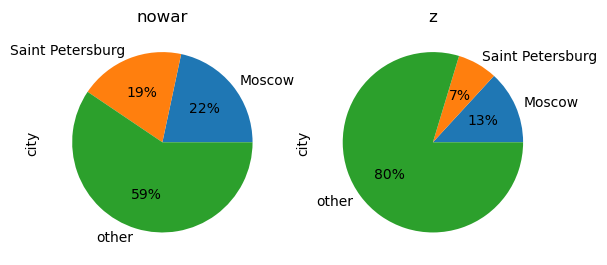

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2)
data_c_p_nowar1.plot.pie(ax = ax1, title = 'nowar', autopct='%1.0f%%')
data_c_p_z1.plot.pie(ax = ax2, title = 'z', autopct='%1.0f%%')

# plt.savefig('city.pdf')

# Age

In [25]:
data = data[data['country'] == 'Russia']

In [28]:
n_total_nowar = 3267
n_total_z = 7284

In [29]:
data['age'].max()-data['age'].min()

108.0

In [30]:
data['age'].max()

122.0

In [31]:
data['age'][data['cl'] == 'nowar'][data['age']<100].value_counts().sum()

1529

In [32]:
def calc_standart_error(x_positive, n):
    p = x_positive/n
    sigma = np.sqrt( 1/(n-1)*( (1-p)**2*x_positive + p**2*(n-x_positive) ) )
    return sigma/np.sqrt(n)

In [33]:
def smooth(y, box_pts = 3):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [34]:
list_nowar = []
list_z = []
n_nowar = data['age'][data['cl'] == 'nowar'].value_counts().sum()
n_z = data['age'][data['cl'] == 'z'].value_counts().sum()

for val in range(14,100):
    x_nowar = data['age'][data['cl'] == 'nowar'][data['age']==val].value_counts().sum()
    list_nowar.append(calc_standart_error(x_nowar, n_nowar))
    
for val in range(14,100):
    x_z = data['age'][data['cl'] == 'z'][data['age']==val].value_counts().sum()
    list_z.append(calc_standart_error(x_z, n_z))

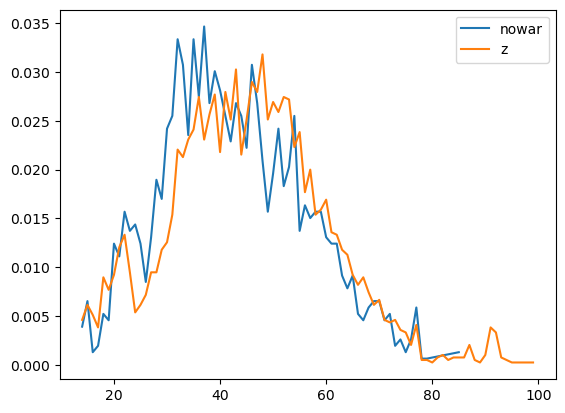

In [35]:
plt.figure()
data_age_normalized_nowar = (data['age'][data['cl'] == 'nowar'][data['age']<100].value_counts().sort_index()/data['age'][data['cl'] == 'nowar'][data['age']<100].value_counts().sum())
data_age_normalized_nowar.plot()
data_age_normalized_z = (data['age'][data['cl'] == 'z'][data['age']<100].value_counts().sort_index()/data['age'][data['cl'] == 'z'][data['age']<100].value_counts().sum())
data_age_normalized_z.plot()
plt.legend(['nowar', 'z'])
# plt.ylim([0,0.045])

In [36]:
data_nowar = np.zeros(86)
data_z = np.zeros(86)
for i in range(14,100):
    if (i in data_age_normalized_nowar.index):
        data_nowar[i-14] = data_age_normalized_nowar[i]
    if (i in data_age_normalized_z.index):
        data_z[i-14] = data_age_normalized_z[i]

In [37]:
se_nowar = np.abs(np.array(list_nowar))
se_z = np.abs(np.array(list_z))

(14.0, 100.0)

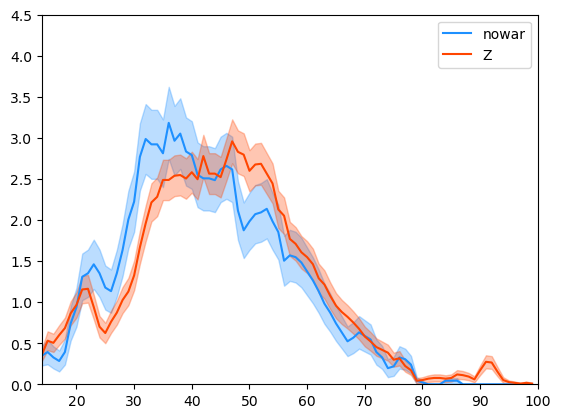

In [38]:
plt.figure()
plt.plot(range(14,100), smooth(data_nowar)*100, label = 'nowar', color = colors[0])
plt.fill_between(range(14,100), smooth(data_nowar - se_nowar)*100,
                smooth(data_nowar + se_nowar)*100, alpha = 0.3, color = colors[0])
# plt.plot(range(14,100), smooth(data_nowar - new_se_nowar), alpha = 0.5, color = colors[0])
# plt.plot(range(14,100), smooth(data_nowar + new_se_nowar), alpha = 0.5, color = colors[0])
# plt.fill_between(range(14,100), smooth(data_nowar - new_se_nowar), alpha = 0.5, color = colors[0])

plt.plot(range(14,100), smooth(data_z)*100, label = 'Z', color = colors[1])
plt.fill_between(range(14,100), smooth(data_z - se_z)*100,
                smooth(data_z + se_z)*100, alpha = 0.3, color = colors[1])
# plt.plot(range(14,100), smooth(data_z - new_se_z), alpha = 0.5, color = colors[1])
# plt.plot(range(14,100), smooth(data_z + new_se_z), alpha = 0.5, color = colors[1])
# plt.fill_between(range(14,100), smooth(data_z - new_se_z), alpha = 0.5, color = colors[1])

plt.legend()
plt.ylim([0,4.5])
plt.xlim([14,100])

In [39]:
f_nowar = 0.67
df_nowar = 0.07
f_z = 0.96
df_z = 0.03

data_age_normalized_nowar1 = (data_age_normalized_nowar*f_z - (1-f_nowar)*data_age_normalized_z)/(f_nowar + f_z - 1)
data_age_normalized_z1 = (data_age_normalized_z*f_nowar - (1-f_z)*data_age_normalized_z)/(f_nowar + f_z - 1)



In [40]:
list_nowar = []
list_z = []
n_nowar = data['age'][data['cl'] == 'nowar'].value_counts().sum()
n_z = data['age'][data['cl'] == 'z'].value_counts().sum()

for val in range(14,100):
    x_nowar = data['age'][data['cl'] == 'nowar'][data['age']==val].value_counts().sum()
    list_nowar.append(calc_standart_error(x_nowar, n_nowar))
    
for val in range(14,100):
    x_z = data['age'][data['cl'] == 'z'][data['age']==val].value_counts().sum()
    list_z.append(calc_standart_error(x_z, n_z))

In [41]:
data_nowar = np.zeros(86)
data_z = np.zeros(86)
for i in range(14,100):
    if (i in data_age_normalized_nowar.index):
        data_nowar[i-14] = data_age_normalized_nowar1[i]
    if (i in data_age_normalized_z.index):
        data_z[i-14] = data_age_normalized_z1[i]

# data_nowar = np.abs(np.nan_to_num(np.array(data_age_normalized_nowar1)))
# data_z = np.abs(np.nan_to_num(np.array(data_age_normalized_z1)))
se_nowar = np.abs(np.array(list_nowar))
se_z = np.abs(np.array(list_z))

eps5 = np.sqrt(df_nowar**2+df_z**2)/(f_nowar + f_z -1)
    
eps1 = np.sqrt((df_z/f_z)**2 + eps5**2)
eps2 = np.sqrt((df_nowar/(1-f_nowar))**2 + eps5**2)

eps3 = np.sqrt((se_nowar/data_nowar)**2 + eps1**2)
eps4 = np.sqrt((se_z/data_z)**2 + eps2**2)

new_se_nowar = np.nan_to_num(np.sqrt((data_nowar*f_z/(f_nowar+f_z-1)*eps3)**2 + 
                             (data_z*(1-f_nowar)/(f_nowar+f_z-1)*eps4)**2))


eps5_z = np.sqrt(df_z**2+df_nowar**2)/(f_nowar + f_z -1)

eps1_z = np.sqrt((df_nowar/f_nowar)**2 + eps5_z**2)
eps2_z = np.sqrt((df_z/(1-f_z))**2 + eps5_z**2)

eps3_z = np.sqrt((se_z/data_z)**2 + eps1_z**2)
eps4_z = np.sqrt((se_nowar/data_nowar)**2 + eps2_z**2)

new_se_z = np.nan_to_num(np.sqrt((data_z*f_nowar/(f_nowar+f_z-1)*eps3_z)**2 + 
                             (data_nowar*(1-f_z)/(f_nowar+f_z-1)*eps4_z)**2))

/tmp/ipykernel_33360/673596879.py:19: RuntimeWarning: invalid value encountered in divide
  eps3 = np.sqrt((se_nowar/data_nowar)**2 + eps1**2)
/tmp/ipykernel_33360/673596879.py:20: RuntimeWarning: invalid value encountered in divide
  eps4 = np.sqrt((se_z/data_z)**2 + eps2**2)
/tmp/ipykernel_33360/673596879.py:31: RuntimeWarning: invalid value encountered in divide
  eps3_z = np.sqrt((se_z/data_z)**2 + eps1_z**2)
/tmp/ipykernel_33360/673596879.py:32: RuntimeWarning: invalid value encountered in divide
  eps4_z = np.sqrt((se_nowar/data_nowar)**2 + eps2_z**2)


(0.0, 0.045)

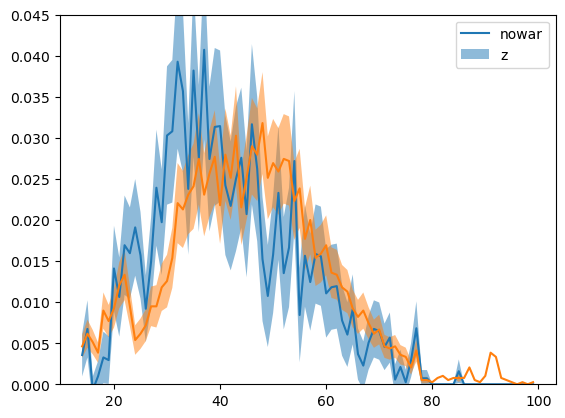

In [42]:
plt.figure()
plt.plot(range(14,100), data_nowar)
plt.fill_between(range(14,100), data_nowar - new_se_nowar,
                data_nowar + new_se_nowar, alpha = 0.5)
plt.plot(range(14,100), data_z)
plt.fill_between(range(14,100), data_z - new_se_z,
                data_z + new_se_z, alpha = 0.5)
plt.legend(['nowar', 'z'])
plt.ylim([0,0.045])

In [43]:
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']
colors = ['dodgerblue', 'orangered']

(14.0, 100.0)

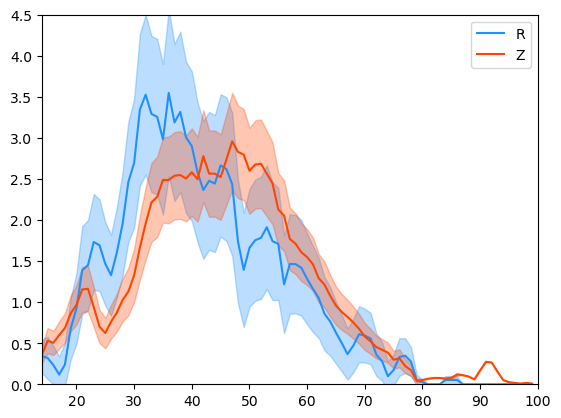

In [44]:
plt.figure()
plt.plot(range(14,100), smooth(data_nowar)*100, label = 'R', color = colors[0])
plt.fill_between(range(14,100), smooth(data_nowar - new_se_nowar)*100,
                smooth(data_nowar + new_se_nowar)*100, alpha = 0.3, color = colors[0])
# plt.plot(range(14,100), smooth(data_nowar - new_se_nowar), alpha = 0.5, color = colors[0])
# plt.plot(range(14,100), smooth(data_nowar + new_se_nowar), alpha = 0.5, color = colors[0])
# plt.fill_between(range(14,100), smooth(data_nowar - new_se_nowar), alpha = 0.5, color = colors[0])

plt.plot(range(14,100), smooth(data_z)*100, label = 'Z', color = colors[1])
plt.fill_between(range(14,100), smooth(data_z - new_se_z)*100,
                smooth(data_z + new_se_z)*100, alpha = 0.3, color = colors[1])
# plt.plot(range(14,100), smooth(data_z - new_se_z), alpha = 0.5, color = colors[1])
# plt.plot(range(14,100), smooth(data_z + new_se_z), alpha = 0.5, color = colors[1])
# plt.fill_between(range(14,100), smooth(data_z - new_se_z), alpha = 0.5, color = colors[1])

plt.legend()
plt.ylim([0,4.5])
plt.xlim([14,100])

# plt.savefig('age.pdf')

In [45]:
np.sum(np.array(range(14,100))*data_nowar)

41.90676453284833

In [46]:
np.sum(np.array(range(14,100))*data_z)

45.47781482431394

In [47]:
def median(histogram):
    total = 0
    median_index = (sum(histogram) + 1) / 2
    for ind in range(len(histogram)):
        total += histogram[ind]
        if total > median_index:
            return 14+ind

In [48]:
median(data_nowar*n_nowar)

40

In [49]:
median(data_z*n_z)

45

# Values

For the standart error calculation, we assume that the distribution is Bernoulli. Then,
σ_x = sqrt(var) = sqrt(1/(n−1)*sum((x_i−Y)^2)), and SE = σ_x/sqrt(n)

In [50]:
def plot_barchart(data, column_name, f_z = 1, df_z = 0, f_nowar = 1, df_nowar = 0, gender_value = None, ax = None):
    
    if not ax:
        plt.figure()
        
    if gender_value:
        data_nowar = data[column_name][data['cl'] == 'nowar'][data['gender'] == gender_value].value_counts().sort_index()
        data_z = data[column_name][data['cl'] == 'z'][data['gender'] == gender_value].value_counts().sort_index()
    else:
        data_nowar = data[column_name][data['cl'] == 'nowar'].value_counts().sort_index()
        data_z = data[column_name][data['cl'] == 'z'].value_counts().sort_index()

        
    frame = pd.DataFrame({'nowar': data_nowar, 'z': data_z})

    if gender_value:
        n_nowar = data[column_name][data['cl'] == 'nowar'][data['gender'] == gender_value].value_counts().sum()
        n_z = data[column_name][data['cl'] == 'z'][data['gender'] == gender_value].value_counts().sum()
    else:
        n_nowar = data[column_name][data['cl'] == 'nowar'].value_counts().sum()
        n_z = data[column_name][data['cl'] == 'z'].value_counts().sum()
    list_nowar = []
    list_z = []
    for val in frame.index:
        x_nowar = frame['nowar'][val]
        x_z = frame['z'][val]
        list_nowar.append(calc_standart_error(x_nowar, n_nowar))
        list_z.append(calc_standart_error(x_z, n_z))

    frame['se_nowar'] = list_nowar
    frame['se_z'] = list_z

    frame['nowar'] = frame['nowar']/n_nowar
    frame['z'] = frame['z']/n_z
    frame['se_nowar'] = frame['se_nowar']#/n_nowar
    frame['se_z'] = frame['se_z']#/n_z
    
    # taking into account the bias
    frame1 = frame.copy()
    frame1['nowar'] = (frame['nowar']*f_z - (1-f_nowar)*frame['z'])/(f_nowar + f_z - 1)
    frame1['z'] = (frame['z']*f_nowar - (1-f_z)*frame['nowar'])/(f_z + f_nowar - 1)
    
    
    if (df_nowar != 0) and (df_z != 0):
        eps5 = np.sqrt(df_nowar**2+df_z**2)/(f_nowar + f_z -1)

        eps1 = np.sqrt((df_z/f_z)**2 + eps5**2)
        eps2 = np.sqrt((df_nowar/(1-f_nowar))**2 + eps5**2)

        eps3 = np.sqrt((frame['se_nowar']/frame['nowar'])**2 + eps1**2)
        eps4 = np.sqrt((frame['se_z']/frame['z'])**2 + eps2**2)

        frame1['se_nowar'] = np.sqrt((frame['nowar']*f_z/(f_nowar+f_z-1)*eps3)**2 + 
                                     (frame['z']*(1-f_nowar)/(f_nowar+f_z-1)*eps4)**2)


        eps5_z = np.sqrt(df_z**2+df_nowar**2)/(f_nowar + f_z -1)

        eps1_z = np.sqrt((df_nowar/f_nowar)**2 + eps5_z**2)
        eps2_z = np.sqrt((df_z/(1-f_z))**2 + eps5_z**2)

        eps3_z = np.sqrt((frame['se_z']/frame['z'])**2 + eps1_z**2)
        eps4_z = np.sqrt((frame['se_nowar']/frame['nowar'])**2 + eps2_z**2)

        frame1['se_z'] = np.sqrt((frame['z']*f_nowar/(f_nowar+f_z-1)*eps3_z)**2 + 
                                     (frame['nowar']*(1-f_z)/(f_nowar+f_z-1)*eps4_z)**2)
    
    
    frame = frame1.copy()
    
    frame['nowar'] = frame['nowar']*100
    frame['z'] = frame['z']*100
    frame['se_nowar'] = frame['se_nowar']*100
    frame['se_z'] = frame['se_z']*100

    if not ax:
        frame[['nowar', 'z']].plot(kind='bar', yerr=frame[['se_nowar', 'se_z']].to_numpy().T)
    else:
        frame[['nowar', 'z']].plot(kind='bar', yerr=frame[['se_nowar', 'se_z']].to_numpy().T, ax = ax, 
                                   color = ['dodgerblue', 'orangered'], alpha = 0.7)

In [51]:
def normalize_by_age(data_initial, column_name = None):
    
    age_groups = np.linspace(20,125,22)
    
    data_new = pd.DataFrame(columns=data_initial.columns)
    
    for i in range(len(age_groups)):
        
        if i == 0:
            age_min = 14
        else:
            age_min = age_groups[i]-5
            
        data_nowar_age = data[pd.notnull(data[column_name])][data['cl'] == 'nowar'][data['age'] >= age_min][data['age'] < age_groups[i]]
        data_z_age = data[pd.notnull(data[column_name])][data['cl'] == 'z'][data['age'] >= age_min][data['age'] < age_groups[i]]
        
        num_el_nowar = data_nowar_age[column_name].value_counts().sum()
        num_el_z = data_z_age[column_name].value_counts().sum()
        
#         print(num_el_nowar, num_el_z)
        
        if num_el_nowar<num_el_z:
            data_new = pd.concat([data_new, data_nowar_age])
            data_new = pd.concat([data_new, data_z_age.sample(n = num_el_nowar)])
        else:
            data_new = pd.concat([data_new, data_z_age])
            data_new = pd.concat([data_new, data_nowar_age.sample(n = num_el_z)])
    
    return data_new

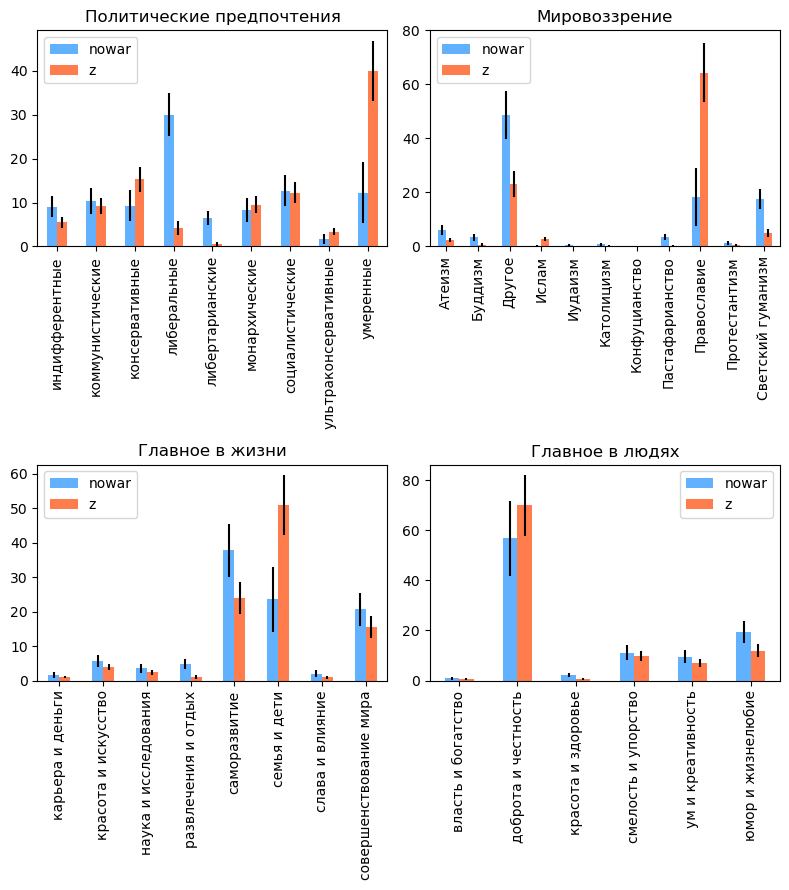

In [52]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize = (8,9))

plot_barchart(data, 'political', ax = ax1, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'religion', ax = ax2, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'life_views', ax = ax3, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'people_views', ax = ax4, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
ax1.set_title('Политические предпочтения')
# ax1.set_ylim([0,55])
ax2.set_title('Мировоззрение')
ax2.set_ylim([0,80])
ax3.set_title('Главное в жизни')
ax4.set_title('Главное в людях')
# ax3.set_ylim([0,55])
plt.tight_layout()
# plt.savefig('values.pdf')

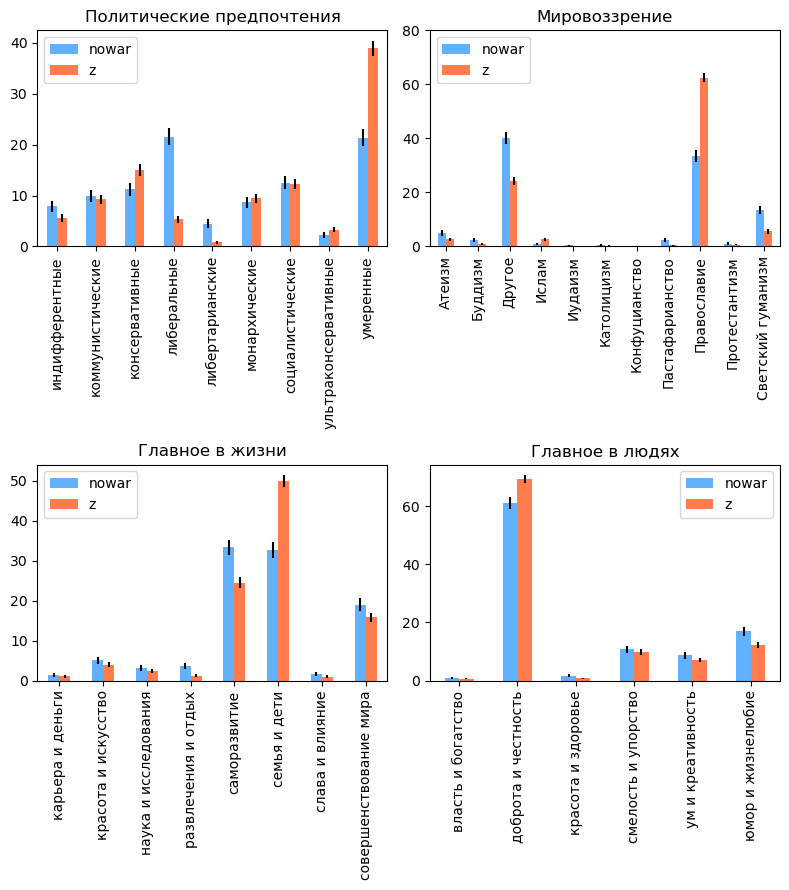

In [53]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, figsize = (8,9))

plot_barchart(data, 'political', ax = ax1, f_nowar = 1, f_z = 1, df_nowar = 0, df_z = 0)
plot_barchart(data, 'religion', ax = ax2, f_nowar = 1, f_z = 1, df_nowar = 0, df_z = 0)
plot_barchart(data, 'life_views', ax = ax3, f_nowar = 1, f_z = 1, df_nowar = 0, df_z = 0)
plot_barchart(data, 'people_views', ax = ax4, f_nowar = 1, f_z = 1, df_nowar = 0, df_z = 0)
ax1.set_title('Политические предпочтения')
# ax1.set_ylim([0,55])
ax2.set_title('Мировоззрение')
ax2.set_ylim([0,80])
ax3.set_title('Главное в жизни')
ax4.set_title('Главное в людях')
# ax3.set_ylim([0,55])
plt.tight_layout()
# plt.savefig('values_not_corrected.pdf')

(0.0, 70.0)

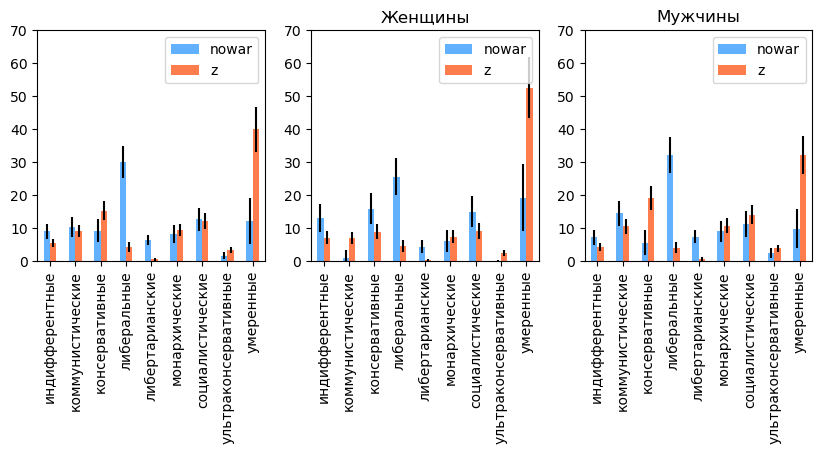

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,3))

plot_barchart(data, 'political', ax = ax1, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'political', gender_value = 'F', ax = ax2, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'political', gender_value = 'M', ax = ax3, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
ax1.set_ylim([0,70])
ax2.set_title('Женщины')
ax2.set_ylim([0,70])
ax3.set_title('Мужчины')
ax3.set_ylim([0,70])

In [55]:
data['political'][data['cl'] == 'nowar'].describe()

count             622
unique              9
top       либеральные
freq              134
Name: political, dtype: object

In [56]:
data['political'][data['cl'] == 'z'].describe()

count           995
unique            9
top       умеренные
freq            387
Name: political, dtype: object

In [57]:
662/n_total_nowar

0.20263238445056628

In [58]:
995/n_total_z

0.13660076880834707

(0.0, 90.0)

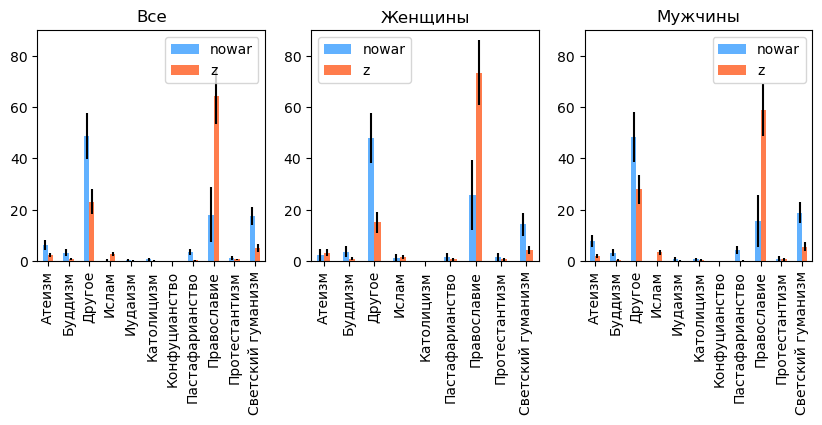

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,3))

plot_barchart(data, 'religion', ax = ax1, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'religion', gender_value = 'F', ax = ax2, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'religion', gender_value = 'M', ax = ax3, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
ax1.set_title('Все')
ax1.set_ylim([0,90])
ax2.set_title('Женщины')
ax2.set_ylim([0,90])
ax3.set_title('Мужчины')
ax3.set_ylim([0,90])

In [60]:
data['religion'][data['cl'] == 'nowar'].describe()

count        482
unique        10
top       Другое
freq         194
Name: religion, dtype: object

In [61]:
482/n_total_nowar

0.1475359657177839

In [62]:
data['religion'][data['cl'] == 'z'].describe()

count             728
unique             11
top       Православие
freq              455
Name: religion, dtype: object

In [63]:
728/n_total_z

0.09994508511806699

(0.0, 75.0)

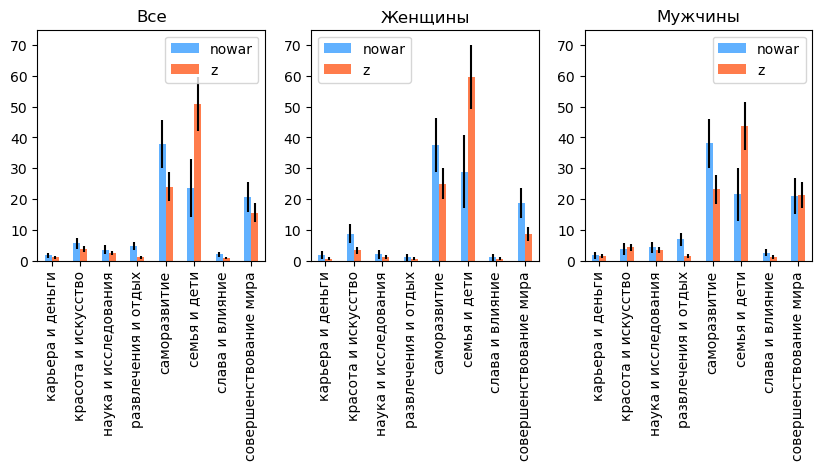

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,3))

plot_barchart(data, 'life_views', ax = ax1, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'life_views', gender_value = 'F', ax = ax2, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'life_views', gender_value = 'M', ax = ax3, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
ax1.set_title('Все')
ax1.set_ylim([0,75])
ax2.set_title('Женщины')
ax2.set_ylim([0,75])
ax3.set_title('Мужчины')
ax3.set_ylim([0,75])

In [65]:
data['life_views'][data['cl'] == 'nowar'].describe()

count              589
unique               8
top       саморазвитие
freq               196
Name: life_views, dtype: object

In [66]:
589/n_total_nowar

0.1802877257422712

In [67]:
data['life_views'][data['cl'] == 'z'].describe()

count              999
unique               8
top       семья и дети
freq               498
Name: life_views, dtype: object

In [68]:
999/n_total_z

0.1371499176276771

(0.0, 90.0)

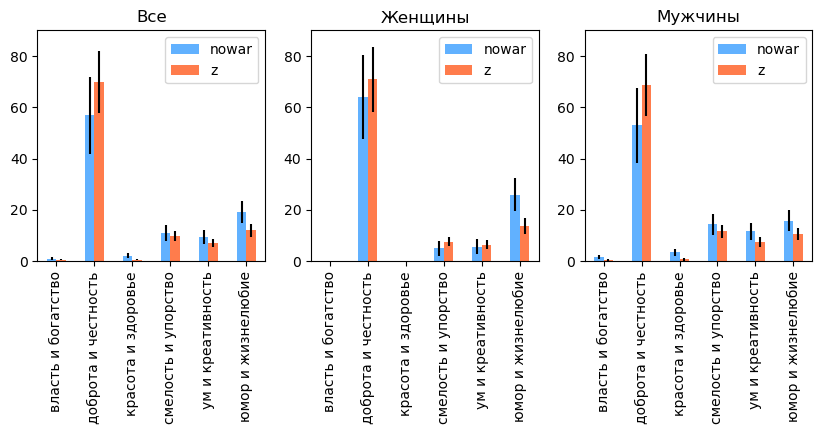

In [69]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,3))

plot_barchart(data, 'people_views', ax = ax1, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'people_views', gender_value = 'F', ax = ax2, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
plot_barchart(data, 'people_views', gender_value = 'M', ax = ax3, f_nowar = f_nowar, f_z = f_z, df_nowar = df_nowar, df_z = df_z)
ax1.set_title('Все')
ax1.set_ylim([0,90])
ax2.set_title('Женщины')
ax2.set_ylim([0,90])
ax3.set_title('Мужчины')
ax3.set_ylim([0,90])

In [70]:
data['people_views'][data['cl'] == 'nowar'].describe()

count                     597
unique                      6
top       доброта и честность
freq                      365
Name: people_views, dtype: object

In [71]:
597/n_total_nowar

0.1827364554637282

In [72]:
data['people_views'][data['cl'] == 'z'].describe()

count                    1066
unique                      6
top       доброта и честность
freq                      739
Name: people_views, dtype: object

In [73]:
1066/n_total_z

0.14634816035145523